<a href="https://colab.research.google.com/github/Luca-Gibellino/Exposure_at_default/blob/main/ITAA_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ITAA_Project

In [2]:
# Library imports
import pandas as pd # Data wrangling; provides the DataFrame data type
import matplotlib.pyplot as plt # Visualization
import numpy as np # Useful mathematical functions and operations
from scipy import stats # Statistical functions
from scipy.stats import norm

Data

In [3]:
data_files = ['spy_us', 'sso_us']
assets = pd.DataFrame() # Creating an empty DataFrame to populate with data
for data_file in data_files:
  df = pd.read_csv(f"{data_file}_d.csv") # f-strings allow insertion of variables into strings
  df["asset"] = [data_file]*df.shape[0] # Creating a columns out of a list of repeated asset names; shape[0] gives the number of rows in a table
  df = df.rename(columns = {"Data":"date", "Zamkniecie":"close"}) # Renaming the date column for consistency
  df = df.loc[:, ["date", "close", "asset"]] # Selecting only the columns which will be used later
  df["date"] = pd.to_datetime(df["date"]) # Converting the date column into an appropiate datatype
  assets = pd.concat([assets, df]) # Adding the modified data to the previously empty DF
assets = assets.pivot(index="date", columns="asset", values="close") # Making each asset into its own column
assets = assets.dropna() # Removing rows with empty 'cells'
assets

asset,spy_us,sso_us
date,,
2006-06-21,99.9444,7.84218
2006-06-22,99.4978,7.75773
2006-06-23,99.4879,7.75623
2006-06-26,99.9345,7.80220
2006-06-27,99.0318,7.66339
...,...,...
2024-01-08,474.6000,64.74000
2024-01-09,473.8800,64.51000
2024-01-10,476.5600,65.24000


Plots

Text(0.5, 1.0, 'Returns of S&P500')

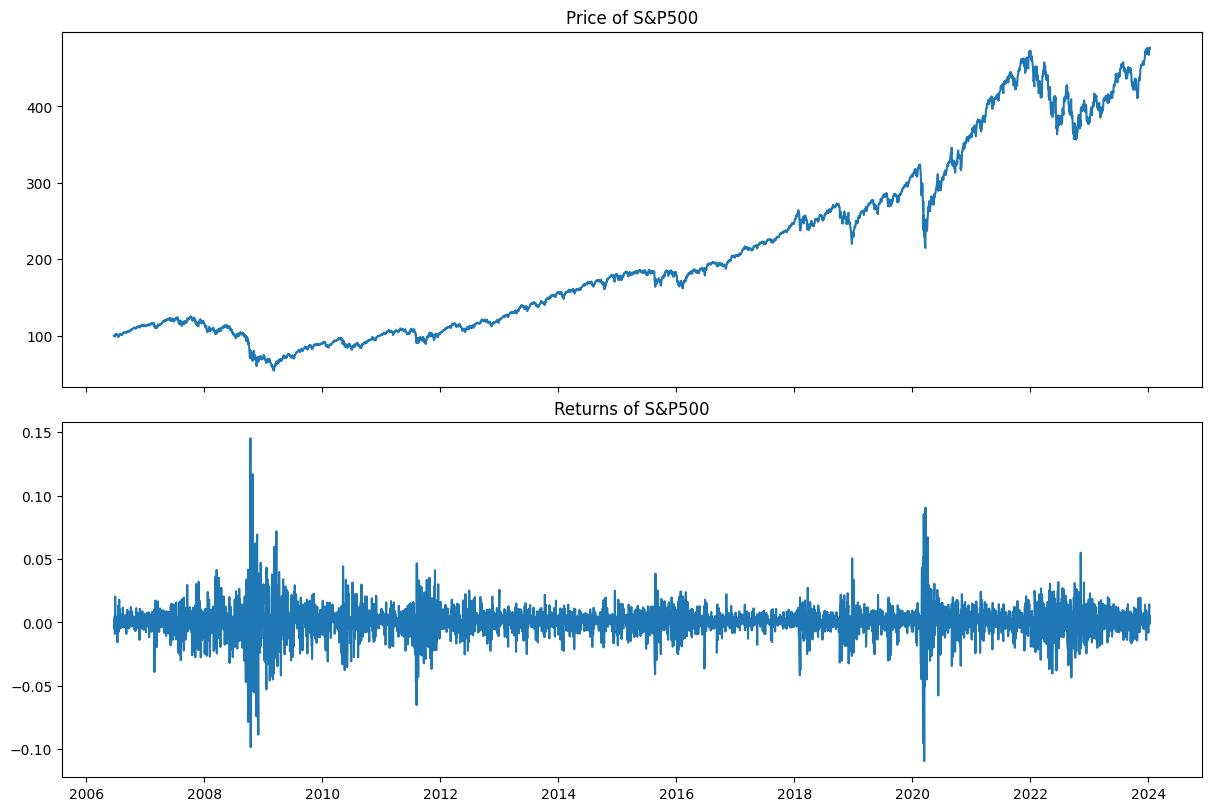

In [4]:
fig, axs = plt.subplots(nrows = 2, figsize=(12, 8), constrained_layout=True, sharex=True)
axs[0].plot(assets['spy_us'],label="Portfolio price")
axs[0].set_title("Price of S&P500")
axs[1].plot(assets['spy_us'].pct_change(), label="Portfolio returns")
axs[1].set_title("Returns of S&P500")

Text(0.5, 1.0, 'Returns of Leverage S&P500')

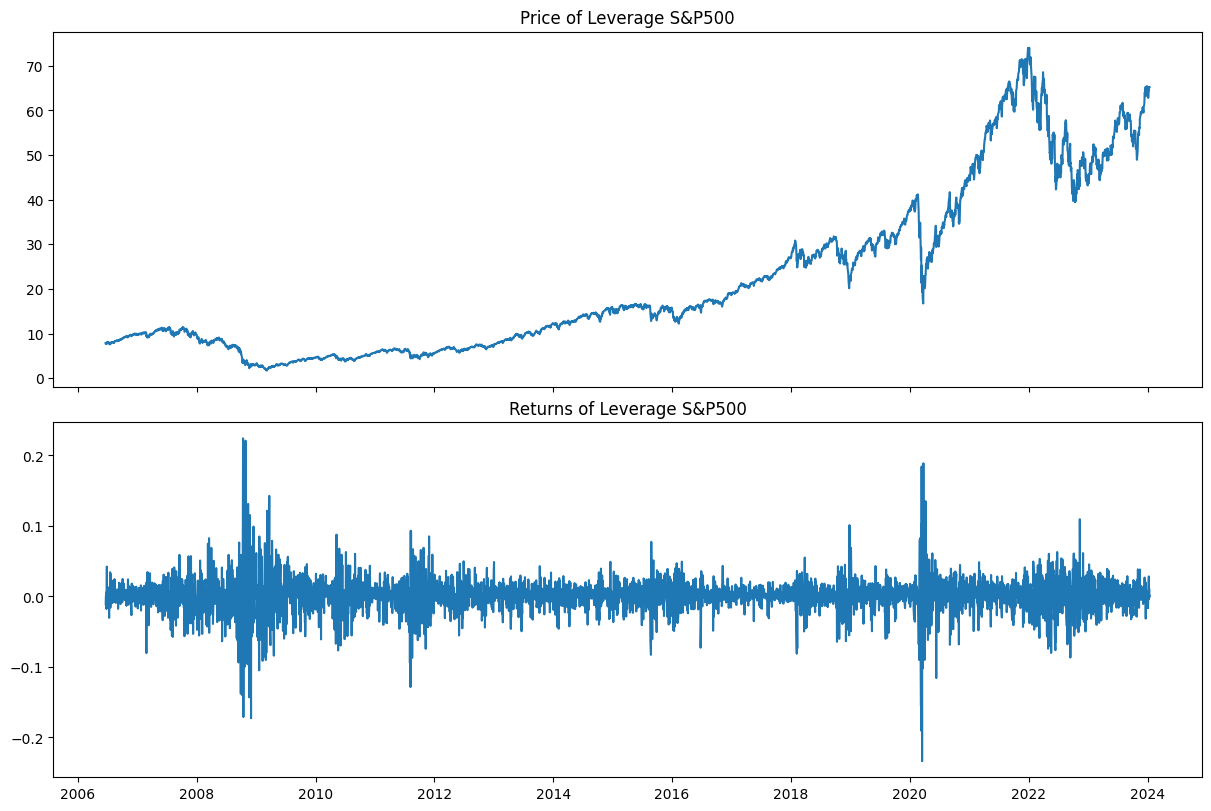

In [5]:
fig, axs = plt.subplots(nrows = 2, figsize=(12, 8), constrained_layout=True, sharex=True)
axs[0].plot(assets['sso_us'],label="Portfolio price")
axs[0].set_title("Price of Leverage S&P500")
axs[1].plot(assets['sso_us'].pct_change(), label="Portfolio returns")
axs[1].set_title("Returns of Leverage S&P500")

Returns

In [6]:
returns = assets.copy()
for asset in ['spy_us', 'sso_us']:
  returns[asset] = returns[asset].pct_change()
returns=returns.dropna()
returns

asset,spy_us,sso_us
date,,
2006-06-22,-0.004468,-0.010769
2006-06-23,-0.000099,-0.000193
2006-06-26,0.004489,0.005927
2006-06-27,-0.009033,-0.017791
2006-06-28,0.007214,0.008933
...,...,...
2024-01-08,0.014276,0.028435
2024-01-09,-0.001517,-0.003553
2024-01-10,0.005655,0.011316


Correlation

In [7]:
corr = returns.corr()
corr

asset,spy_us,sso_us
asset,,
spy_us,1.000000,0.994528
sso_us,0.994528,1.000000


Cholesky matrix

In [8]:
cholesky_decomp = np.linalg.cholesky(corr)
cholesky_decomp

array([[1.        , 0.        ],
       [0.99452829, 0.10446761]])

Mean

In [9]:
mean_ret = returns.mean(axis=0)
mean_ret

asset
spy_us    0.000432
sso_us    0.000785
dtype: float64

Volatility

In [10]:
volatility = returns.agg("std")
volatility

asset
spy_us    0.012517
sso_us    0.024651
dtype: float64

Random returns

In [11]:
randoms = np.abs(np.random.rand(99, 251))
randoms

array([[0.11962831, 0.03983211, 0.04843583, ..., 0.55696794, 0.68177185,
        0.31952133],
       [0.72205848, 0.94893331, 0.04136649, ..., 0.16469156, 0.93253739,
        0.50740233],
       [0.34936934, 0.10207965, 0.57183461, ..., 0.89298479, 0.42063618,
        0.54006769],
       ...,
       [0.21551559, 0.12192545, 0.37521642, ..., 0.9305699 , 0.93379711,
        0.39551876],
       [0.22547367, 0.8794259 , 0.23694105, ..., 0.99278456, 0.37500658,
        0.7342426 ],
       [0.9159137 , 0.57361661, 0.49298018, ..., 0.36196265, 0.96159507,
        0.66284413]])

Dividend yield

In [12]:
annual_div = 0.0033
quarter_div = (1 + annual_div) ** (1/4) - 1
quarter_div

0.0008239810233570122

Montecarlo simulation

Text(0.5, 1.0, 'Simulated Stock Price Paths')

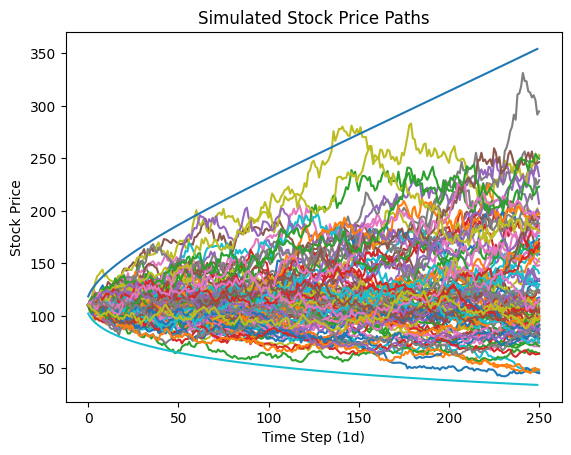

In [16]:
ss=np.zeros([99,251])
a=np.zeros([99,251])
lower_bound=np.zeros([250])
upper_bound=np.zeros([250])
s0=110 #initial value
ss[:,0]=s0
for n in range(1,251):
  for i in range(0,99):
    #a[i,n-1]=norm.ppf(randoms[i,n-1],loc=mean_ret[1],scale=volatility[1])
    #ss[i,n]=s[i,n-1]*np.exp(a[i-1,n])
    ss[i,n]=ss[i,n-1]*np.exp((mean_ret[1]-(volatility[1]**2)/2)+volatility[1]*np.random.normal())
    if n==(252/4-1) or n==(2*(252/4)-1) or n==(3*(252/4)-1):
      ss[i,n]=ss[i,n]*(1-quarter_div)

    #99.7% of simulations should be inside this range:
    lower_bound[n-1] = s0*np.exp(-3*volatility[1]*np.sqrt(n))
    upper_bound[n-1] = s0*np.exp(3*volatility[1]*np.sqrt(n))

plt.plot(np.transpose(ss))
plt.plot(lower_bound)
plt.plot(upper_bound)
plt.xlabel('Time Step (1d)')
plt.ylabel('Stock Price')
plt.title('Simulated Stock Price Paths')

Find the worst-case scenario

In [14]:
worst_scenario=ss[0,250]
for m in range(0,99):
  if ss[m,250]<worst_scenario:
    worst_scenario=ss[m,250]
  else:
    worst_scenario=worst_scenario
print("The worst-case scenario is "+ str(worst_scenario))

The worst-case scenario is 39.758717772042445


Annual rate of return of the worst scenario

In [15]:
Annual_rate_ws=(worst_scenario/s0)-1
print("The worst-case scenario annual rate of return is "+ str(Annual_rate_ws))

The worst-case scenario annual rate of return is -0.6385571111632504
